In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_csv_path = "Resources/city_data.csv"
city_df = pd.read_csv(city_csv_path)
ride_csv_path = "Resources/ride_data.csv"
ride_df = pd.read_csv(ride_csv_path)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
city_ride_df = pd.merge(ride_df, city_df, on="city")
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [5]:
city_ride_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [6]:
ride_counts = city_ride_df["city"].value_counts()
ride_counts.head()

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
Name: city, dtype: int64

In [7]:
grouped_city_df = city_ride_df.groupby(['city'])                     

In [8]:
city_fare_avg = grouped_city_df["fare"].mean()
city_fare_avg.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
ride_counts = ride_counts.to_frame().reset_index()
ride_counts.head()

,index,city
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [10]:
ride_counts = ride_counts.rename(columns= {'city': 'ride_counts'})
ride_counts = ride_counts.rename(columns= {'index': 'city'})
ride_counts.head()

,city,ride_counts
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [11]:
city_summary_df = pd.merge(city_df, ride_counts, on="city")
city_summary_df.head()

,city,driver_count,type,ride_counts
0,Richardfort,38,Urban,28
1,Williamsstad,59,Urban,23
2,Port Angela,67,Urban,19
3,Rodneyfort,34,Urban,23
4,West Robert,39,Urban,31


In [12]:
city_fare_avg = city_fare_avg.to_frame().reset_index()
city_fare_avg.head()

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [13]:
city_fare_avg = city_fare_avg.rename(columns= {'fare': 'avg_fare'})
city_fare_avg.head()

,city,avg_fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [14]:
city_summary_df = pd.merge(city_summary_df , city_fare_avg , on="city")
city_summary_df.head()

,city,driver_count,type,ride_counts,avg_fare
0,Richardfort,38,Urban,28,22.373214
1,Williamsstad,59,Urban,23,24.362174
2,Port Angela,67,Urban,19,23.836842
3,Rodneyfort,34,Urban,23,28.616957
4,West Robert,39,Urban,31,25.123871


In [15]:
x_rides , y_fare, s_drivers = city_summary_df.iloc[:,3], city_summary_df.iloc[:,4], city_summary_df.iloc[:,1]
#city_summary_df.iloc[:,2] = 'Rural'

<IPython.core.display.Javascript object>


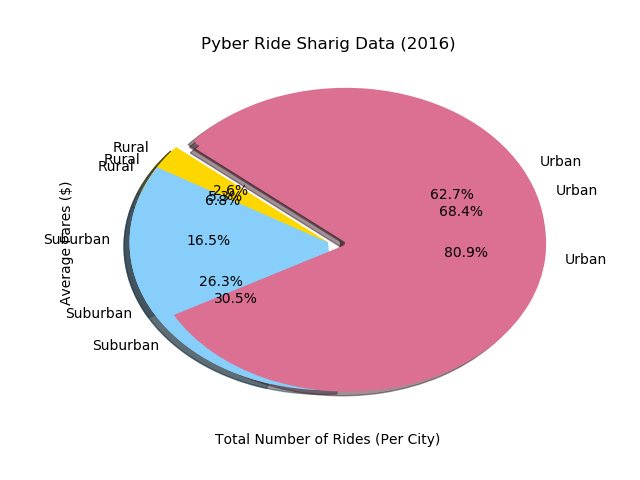

In [16]:
plt.title('Pyber Ride Sharig Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
colors = {'Urban':'red', 'Suburban':'blue', 'Rural':'gold'}
plt.scatter(x=x_rides, y = y_fare, s = s_drivers, alpha = 0.5, c = city_summary_df['type'].apply(lambda x: colors[x]))

In [17]:
grouped_type_df = city_ride_df.groupby(['type'])  
type_fare_sum = grouped_type_df["fare"].sum()
type_fare_sum.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
type_fare_sum = type_fare_sum.to_frame().reset_index()
type(type_fare_sum)

pandas.core.frame.DataFrame

In [19]:
explode = (0, 0, 0.1)
colors2 = {'Urban':'palevioletred', 'Suburban':'lightskyblue', 'Rural':'gold'}
plt.pie(type_fare_sum['fare'], explode=explode, labels = type_fare_sum['type'], colors=type_fare_sum['type'].apply(lambda x: colors2[x]),
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [20]:
grouped_type_df_2 = city_summary_df.groupby(['type'])  
type_rides_sum = grouped_type_df_2["ride_counts"].sum()
type_rides_sum = type_rides_sum.to_frame().reset_index()
type_rides_sum

,type,ride_counts
0,Rural,125
1,Suburban,625
2,Urban,1625


In [21]:
explode = (0, 0, 0.1)
plt.pie(type_rides_sum['ride_counts'], explode=explode, labels = type_rides_sum['type'], colors=type_rides_sum['type'].apply(lambda x: colors2[x]),
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [22]:
grouped_type_df_2 = city_summary_df.groupby(['type'])  
type_drivers_sum = grouped_type_df_2["driver_count"].sum()
type_drivers_sum = type_drivers_sum.to_frame().reset_index()
type_drivers_sum

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [23]:
explode = (0, 0, 0.1)
plt.pie(type_drivers_sum['driver_count'], explode=explode, labels = type_drivers_sum['type'], colors=type_drivers_sum['type'].apply(lambda x: colors2[x]),
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()